In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
from sklearn.metrics import explained_variance_score
from scipy.stats.stats import pearsonr

%matplotlib inline

In [2]:
df = pd.read_csv('Admission_Predict.csv', encoding='utf-8')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.columns = ['serial_no', 'gre_score', 'toefl_score', 'university_rating', 'SOP', 'LOR', 'CGPA', 'research', 'COA']
df.head()

,serial_no,gre_score,toefl_score,university_rating,SOP,LOR,CGPA,research,COA
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Normalização dos dados a partir da distância euclidiana
norm = preprocessing.Normalizer(norm='l2')

df['gre_norm'] = norm.fit_transform(df.gre_score.values.reshape(1,-1)).reshape(-1,1)
df['toefl_norm'] = norm.fit_transform(df.toefl_score.values.reshape(1,-1)).reshape(-1,1)
df.head()

,serial_no,gre_score,toefl_score,university_rating,SOP,LOR,CGPA,research,COA,gre_norm,toefl_norm
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.053152,0.054842
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.051102,0.049730
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.049840,0.048336
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.050786,0.051124
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.049525,0.047871


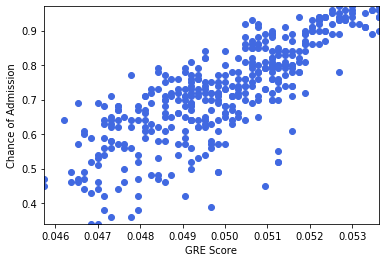

In [5]:
x = df.gre_norm
y = df.COA

plt.scatter(x, y, color='royalblue')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admission')
plt.axis([min(x), max(x), min(y), max(y)])
plt.savefig('../Gráficos/GREScore_Points.png', dpi=600)
plt.show()

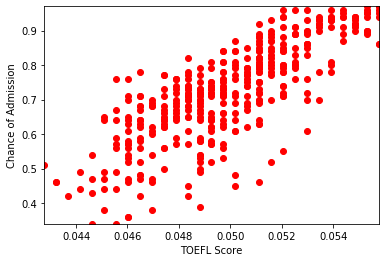

In [6]:
x = df.toefl_norm
y = df.COA

plt.scatter(x, y, color='red')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admission')
plt.axis([min(x), max(x), min(y), max(y)])
#plt.savefig('../Gráficos/TOEFLScore_Points.png', dpi=600)
plt.show()

#plt.savefig('../Gráficos/TOEFLScore_Points.png', dpi=600)

In [25]:
reg = LinearRegression(n_jobs=-1)
from sklearn.metrics import mean_squared_error

R² Treino:  0.6517949730442745
R² Teste:  0.6384490776716452
Correlação: 0.80261
Variância:  0.6385759159754104
Erro Quadrático: 0.007093996180947338
Coeficientes:
-> [60.41176631]


Text(0.5, 1.0, 'Regressão Linear (GRE Score -> COA) com Distância Euclidiana (l2)')

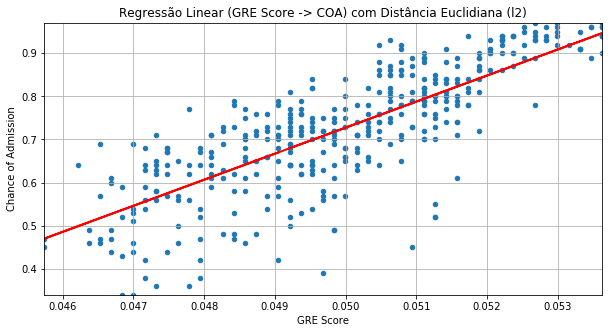

In [26]:
X = np.array(df['gre_norm'])
y = np.array(df['COA'])

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.7, random_state=12)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
expVar = explained_variance_score


print('R² Treino: ', reg.score(X_train, y_train))
print('R² Teste: ', reg.score(X_test, y_test))
print('Correlação: %0.5f' % pearsonr(df['gre_norm'], df['COA'])[0])
print('Variância: ', expVar(y_test, y_pred))
print('Erro Quadrático:', mean_squared_error(y_test, y_pred))
print('Coeficientes:\n->', reg.coef_)

x_range = [df['gre_norm'].min(), df['gre_norm'].max()]
y_range = [df['COA'].min(), df['COA'].max()]

scatter = df.plot(kind = 'scatter', x = 'gre_norm', y = 'COA', xlim = x_range, ylim = y_range, figsize=(10,5))
regLine = scatter.plot(X_test, y_pred, '-', color='red', linewidth=2)

plt.grid(True)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.title("Regressão Linear (GRE Score -> COA) com Distância Euclidiana (l2)")
#plt.savefig('../Gráficos/LinearReg_GRE.png', dpi=600)

R² Treino:  0.6128047079290463
R² Teste:  0.6324363454269494
Correlação: 0.79159
Variância:  0.6324835746356401
Erro Quadrático: 0.007479841138090122
Coeficientes:
-> [40.14865515]


Text(0.5, 1.0, 'Regressão Linear (TOEFL Score -> COA) com Distância Euclidiana (l2)')

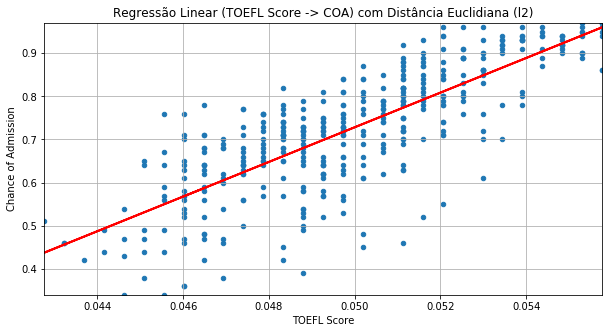

In [27]:
X = np.array(df['toefl_norm'])
y = np.array(df['COA'])

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.7, random_state=2)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
expVar = explained_variance_score

print('R² Treino: ', reg.score(X_train, y_train))
print('R² Teste: ', reg.score(X_test, y_test))
print('Correlação: %0.5f' % pearsonr(df['toefl_norm'], df['COA'])[0])
print('Variância: ', expVar(y_test, y_pred))
print('Erro Quadrático:', mean_squared_error(y_test, y_pred))
print('Coeficientes:\n->', reg.coef_)

x_range = [df['toefl_norm'].min(), df['toefl_norm'].max()]
y_range = [df['COA'].min(), df['COA'].max()]

scatter = df.plot(kind = 'scatter', x = 'toefl_norm', y = 'COA', xlim = x_range, ylim = y_range, figsize=(10,5))
regLine = scatter.plot(X_test, y_pred, '-', color='red', linewidth=2)

plt.grid(True)
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admission")
plt.title("Regressão Linear (TOEFL Score -> COA) com Distância Euclidiana (l2)")
#plt.savefig('../Gráficos/LinearReg_TOEFL.png', dpi=600)

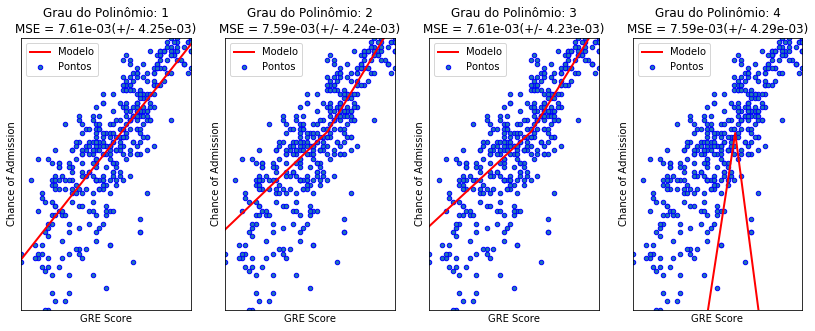

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

n_samples = 30
degrees = [1, 2, 3, 4]

X = np.array(df['gre_norm'])
y = np.array(df['COA'])

x_range = [df['gre_norm'].min(), df['gre_norm'].max()]
y_range = [df['COA'].min(), df['COA'].max()]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo", linewidth=2, color='red')
    plt.scatter(X, y, edgecolor='b', s=20, label="Pontos")
    plt.xlabel("GRE Score")
    plt.ylabel("Chance of Admission")
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.legend(loc="best")
    plt.title("Grau do Polinômio: {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
    #plt.savefig('../Gráficos/MSE_GRE.png', dpi=600)
plt.show()

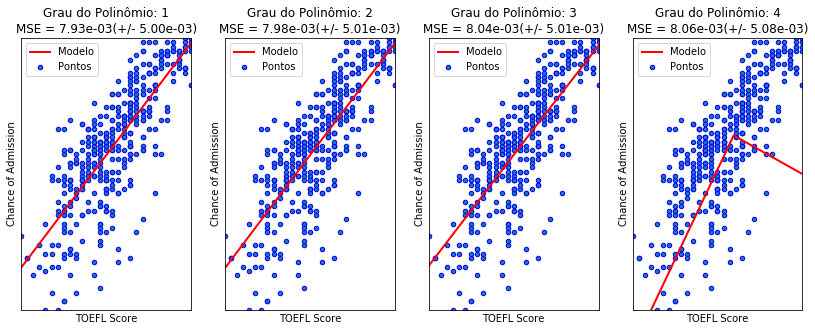

In [30]:
degrees = [1, 2, 3, 4]

X = np.array(df['toefl_norm'])
y = np.array(df['COA'])

x_range = [df['toefl_norm'].min(), df['toefl_norm'].max()]
y_range = [df['COA'].min(), df['COA'].max()]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo", linewidth=2, color='red')
    plt.scatter(X, y, edgecolor='b', s=20, label="Pontos")
    plt.xlabel("TOEFL Score")
    plt.ylabel("Chance of Admission")
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.legend(loc="best")
    plt.title("Grau do Polinômio: {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
    #plt.savefig('../Gráficos/MSE_TOEFL.png', dpi=600)
plt.show()